# 1. Convolution and Correlation Demo
This code demonstrates image processing using correlation for vertical edge detection.

Correlation Result -> 

[[   0.  510.  510.    0.    0.    0. -510. -510.    0.]
 [   0.  510.  765.  255.    0. -255. -765. -510.    0.]
 [   0.  255.  765.  510.    0. -510. -765. -255.    0.]
 [   0.    0.  765.  765.    0. -765. -765.    0.    0.]
 [   0.    0.  765.  765.    0. -765. -765.    0.    0.]
 [   0.    0.  765.  765.    0. -765. -765.    0.    0.]
 [   0.    0.  765.  765.    0. -765. -765.    0.    0.]
 [   0.    0.  765.  765.    0. -765. -765.    0.    0.]
 [   0.    0.  510.  510.    0. -510. -510.    0.    0.]] 



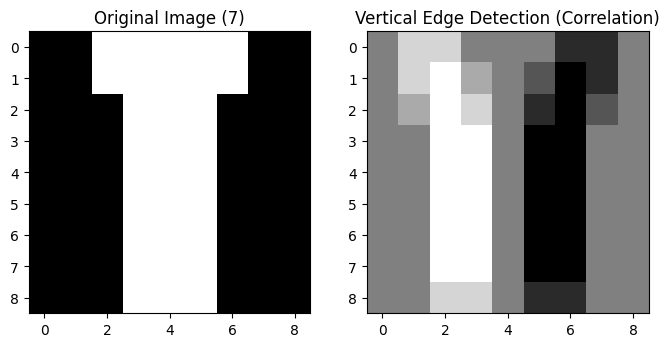

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.signal import correlate2d

# Correlate with Mode "same" - Vertical Edge Detection
# Mode same = Output same size (one pixel padding added)

# Step 1: Create a binary image of "7" (black = 0, white = 255)
image = np.array([
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0]
], dtype=np.float32)

# Step 2: Define a vertical edge detection kernel (Sobel-like)
vertical_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=np.float32)

corr_result = correlate2d(image, vertical_kernel, mode='same')

print("Correlation Result -> \n")
print(corr_result, "\n")

# Step 3: Visualize Results
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image (7)')

axs[1].imshow(corr_result, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Correlation)')

plt.show()

# Additional notes from the notebook:
# - By default, when we visualize an image using imshow(), values are mapped in a range:
#   [cite_start]- Negative values appear dark (black) [cite: 1594]
#   [cite_start]- Zero values appear mid-gray [cite: 1595]
#   [cite_start]- Positive values appear bright (white) [cite: 1596]
# [cite_start]- Correlation (correlate2d) Kernel is flipped [cite: 1597]
# [cite_start]- Convolution (convolve2d) Kernel is NOT flipped [cite: 1598]
# [cite_start]- Modes: same, full and valid [cite: 1600]
#   [cite_start]- If you want output size to match the input (add padding), use 'same' [cite: 1601]
#   [cite_start]- If you do not want padding (output will be smaller), use 'valid' [cite: 1602]
#   [cite_start]- If you want the entire range of the convolution (output will be bigger), use 'full' [cite: 1603]

# 2. MNIST Handwritten Digits Classification
This code builds and trains a neural network using TensorFlow/Keras to classify handwritten digits from the MNIST dataset.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8788 - loss: 0.4263
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9638 - loss: 0.1199
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9772 - loss: 0.0758
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9812 - loss: 0.0598
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9856 - loss: 0.0462
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0877
Test accuracy: 97.79%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


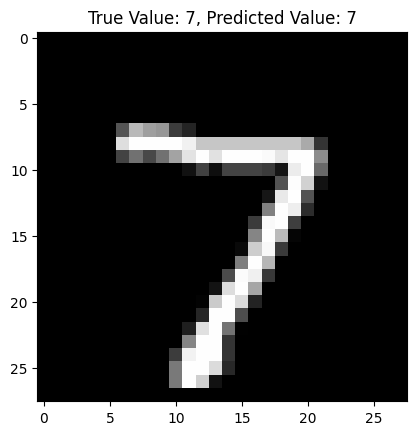

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output classes (0-9)
])

# Dense Layers expect a 1D input, so whenever the preceding layer produces multi-dimensional output,
# [cite_start]we must flatten it to 1D before passing it to a Dense layer. [cite: 58]

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make a prediction on a sample
predictions = model.predict(x_test)
plt.imshow(x_test[0], cmap='gray')
plt.title(f'True Value: {y_test[0]}, Predicted Value: {np.argmax(predictions[0])}')
plt.show()

# 3. House Price Prediction (Regression) with Synthetic Data
This code demonstrates a regression task using a synthetic dataset with a bad model, where the dataset is completely random and the model cannot learn any meaningful patterns.

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features)
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) * 500000  # house prices between 0-500K
x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) * 500000

# Build a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test MAE: ${test_mae:.2f}")

# Make a prediction
sample_input = np.random.rand(1, 10)
predicted_price = model.predict(sample_input)
print(f"Predicted House Price: ${predicted_price[0][0]:.2f}")

# Notes from the notebook:
# [cite_start]- The MAE is around $243K-$245K, meaning on average, predictions are off by nearly half the actual house price. [cite: 261, 628]
# [cite_start]- The dataset is completely random, so there's no real pattern for the model to learn. [cite: 263, 630]
# [cite_start]- The model is guessing house prices randomly, which is why the MAE is so large. [cite: 264, 631]

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255628.3125 - mae: 255628.3125
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252710.7656 - mae: 252710.7656
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254733.3125 - mae: 254733.3125
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244939.7500 - mae: 244939.7500
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252852.2969 - mae: 252852.2969
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252762.9375 - mae: 252762.9375
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253208.4844 - mae: 253208.4844
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251629.5938 - mae: 251629.5938
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260276.0469 - mae: 260276.0469
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250417.9219 - mae: 250417.9219
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249169.4531 - mae: 249169.4531
Epoch 12/20
32/32 ━━━━━━━━━━━━

# 4. House Price Prediction with Normalization
This is a variation of the previous example, where the data is normalized to a [0, 1] range before training. The notes still indicate this is a "bad model" because the data itself is random, so normalization doesn't help the model find a pattern.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features) in [0, 1] range
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000)  # Target values in range 0-1
x_test = np.random.rand(200, 10)
y_test = np.random.rand(200)

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test MAE (Normalized): {test_mae:.4f}")

# Make a prediction
sample_input = np.random.rand(1, 10)  # in [0,1] range
predicted_value = model.predict(sample_input)
print(f"Predicted Value (Normalized): {predicted_value[0][0]:.4f}")

# Notes from the notebook:
# [cite_start]- This is again a bad model because we are still training on random values (just normalized values). [cite: 557]

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3226 - mae: 0.4695
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0943 - mae: 0.2564
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0900 - mae: 0.2562
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0841 - mae: 0.2479
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0818 - mae: 0.2438
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0823 - mae: 0.2451
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0785 - mae: 0.2376
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0815 - mae: 0.2440
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0777 - mae: 0.2380
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0799 - mae: 0.2430
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0802 - mae: 0.2428
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0811 - mae: 0.2447
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

 # 5. California Housing Prediction (Regression) with Real Data and Normalization
This code uses a real-world dataset to predict house prices, demonstrating data splitting and Z-score standardization.

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using Z-score standardization/Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Compute mean & std from training data, then scale
X_test = scaler.transform(X_test)  # Use the same scaling parameters to transform test data

# Notes on normalization:
# - We use the same mean and standard deviation (computed from train) to scale test.
# - This ensures that both training and test data follow the same distribution.
# - Including test data in the computation of mean and standard deviation leads to data leakage, which can result in unrealistically good performance and poor generalization.

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: ${test_mae * 100000:.2f}")  # Convert to actual dollars

# Make a prediction
sample_input = np.expand_dims(X_test[0], axis=0)  # Take one test sample
predicted_price = model.predict(sample_input)
print(f"Predicted House Price: ${predicted_price[0][0] * 100000:.2f}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8232 - mae: 0.8232
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4363 - mae: 0.4363
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4229 - mae: 0.4229
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4093 - mae: 0.4093
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3974 - mae: 0.3974
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3914 - mae: 0.3914
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3852 - mae: 0.3852
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3789 - mae: 0.3789
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3752 - mae: 0.3752
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3776 - mae: 0.3776
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3620 - mae: 0.3620
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3600 - mae: 0.3600
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━

# 6. Sentiment Analysis (Binary Classification) Without Embedding Layer
This code classifies movie reviews as positive or negative without using an embedding layer.


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
# Reviews are preprocessed into sequences of integers
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# IMDB reviews have different lengths, but Dense expects a fixed number of neurons.
# We are ensuring every input is exactly 200 words.
# Pad sequences to ensure fixed-length inputs
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense Layers
model = models.Sequential([
    layers.Flatten(input_shape=(200,)),  # Convert 2D sequences to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make a prediction on the first test sample
predicted_sentiment = model.predict(x_test[0:1])
print("Predicted Sentiment:", "Positive" if predicted_sentiment[0][0] > 0.5 else "Negative")

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4983 - loss: 66.7250
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5355 - loss: 4.3697
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5927 - loss: 2.2032
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6689 - loss: 1.3172
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7396 - loss: 0.8177
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4983 - loss: 2.8007
Test accuracy: 49.91%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Sentiment: Negative


# 7. Sentiment Analysis with Embedding Layer
This code is a more advanced version of the previous example, introducing an Embedding layer to represent words as dense vectors.

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure fixed-length inputs
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model with an Embedding layer
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=200),  # Converts word indices to vectors
    layers.Flatten(),  # Flatten embeddings into a 1D vector
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 432ms/step - accuracy: 0.5809 - loss: 0.6504
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 366ms/step - accuracy: 0.9250 - loss: 0.1965
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 372ms/step - accuracy: 0.9920 - loss: 0.0408
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.9992 - loss: 0.0059
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 364ms/step - accuracy: 0.9999 - loss: 0.0014
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 362ms/step - accuracy: 1.0000 - loss: 4.5317e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 1.0000 - loss: 2.1629e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 363ms/step - accuracy: 1.0000 - loss: 1.4310e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 368ms/step - accuracy: 1.0000 - loss: 1.0492e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 363ms/step - accuracy: 1.0000 - loss: 7.8876e-05
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8532 - loss: 0.6506
Test accuracy: 85.41%


# 8. Breast Cancer Prediction (Binary Classification) with Matplotlib Plotting
This code classifies breast cancer tumors as malignant or benign, and includes plotting for training history.

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7095 - loss: 0.5631 - val_accuracy: 0.9474 - val_loss: 0.2934
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9308 - loss: 0.2847 - val_accuracy: 0.9737 - val_loss: 0.1695
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9516 - loss: 0.1871 - val_accuracy: 0.9825 - val_loss: 0.1161
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9570 - loss: 0.1361 - val_accuracy: 0.9825 - val_loss: 0.0906
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9798 - loss: 0.0907 - val_accuracy: 0.9825 - val_loss: 0.0766
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9668 - loss: 0.1033 - val_accuracy: 0.9825 - val_loss: 0.0714
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9757 - loss: 0.0811 - val_accuracy: 0.9737 - val_loss: 0.0691
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9728 - loss: 0.0892 - val_accuracy: 0.9737 - val_loss: 0.0679


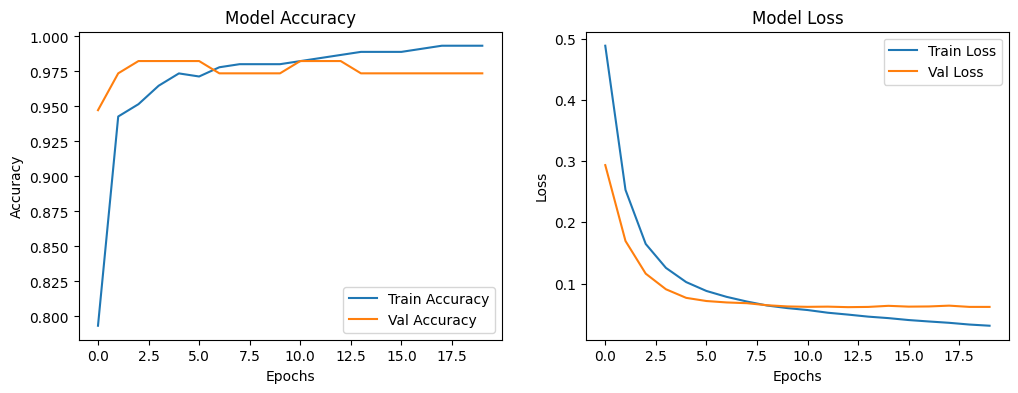

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data using Z-score standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model and store history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot accuracy and loss using Matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")
plt.show()

# 9. Wine Quality Prediction (Multiclass Classification) with stratify
This code classifies wines into three types and introduces the stratify parameter for data splitting, which is crucial for imbalanced datasets.

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5658 - loss: 1.0359 - val_accuracy: 0.7222 - val_loss: 0.8462
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7360 - loss: 0.7556 - val_accuracy: 0.7778 - val_loss: 0.6729
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8320 - loss: 0.6021 - val_accuracy: 0.7778 - val_loss: 0.5369
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9345 - loss: 0.4509 - val_accuracy: 0.8889 - val_loss: 0.4306
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9780 - loss: 0.3405 - val_accuracy: 0.9167 - val_loss: 0.3490
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9762 - loss: 0.2700 - val_accuracy: 0.9167 - val_loss: 0.2850
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9785 - loss: 0.2087 - val_accuracy: 0.9444 - val_loss: 0.2320
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9969 - loss: 0.1531 - val_accuracy: 0.9444 - val_loss: 0.1966
Epoch 9/50


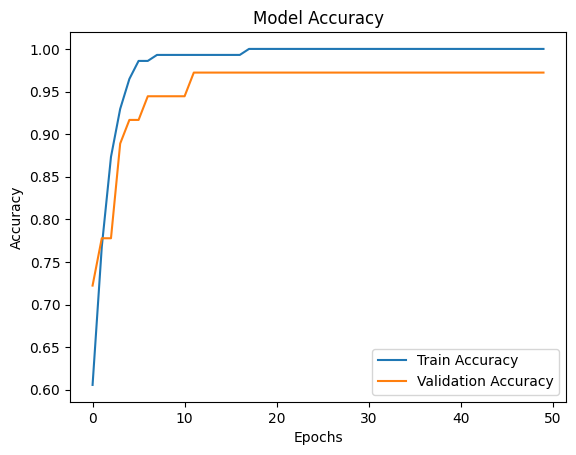

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Class: 0, Actual Class: 0


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split dataset into training and testing sets with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Notes on `stratify`:
# - Using `stratify=y` ensures that the proportion of each class remains the same in both training and testing sets, leading to a more balanced and representative split.
# - This is always important for classification problems, especially with unequal class distribution.
# - A random split without stratification can skew the distribution and lead to poor generalization.

# Normalize features using Z-score standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes (0, 1, 2)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Since y is not one-hot encoded
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Predict a sample
sample_input = np.expand_dims(X_test[0], axis=0)  # Take one test sample
predicted_class = np.argmax(model.predict(sample_input))
print(f'Predicted Class: {predicted_class}, Actual Class: {y_test[0]}')